In [3]:
# lousin Babayan
# BSAN 6070
# CA 01

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [6]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
print(df.shape)

(1460, 81)


In [8]:
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
# check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# total number of rows is 1460

# columns that include greater than 50% missing data are Alley, PoolQC, Fence, MiscFeature
# these columns will most likely be dropped

# columns that have 10% - 50% missing data are FirePlaceQU and LotFrontage
# this missing data will be replaced with the median

# columns that have less than 10% missing data are BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2, Electrical
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCong
# rows with missing values for these columns will most likely be deleted


In [11]:
# group all categorical columns together
categorical = df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'] 
categorical

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [12]:
numeric = df.dtypes[df.dtypes != 'object']
numeric

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
# phase 1 *********************

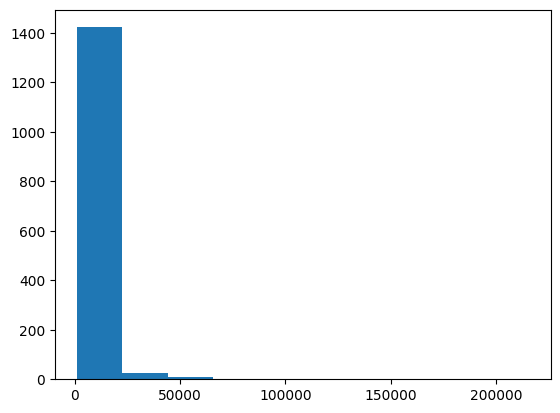

In [13]:
# numeric 
plt.hist(df['LotArea'])
plt.show()

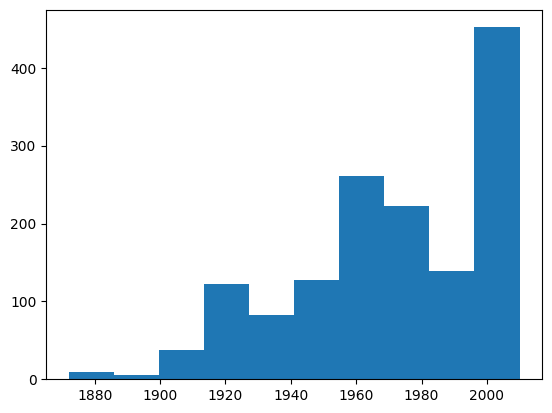

In [14]:
# numeric
plt.hist(df['YearBuilt'])
plt.show()

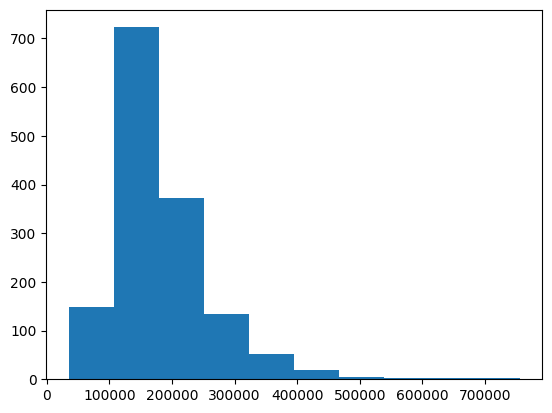

In [15]:
# numeric
plt.hist(df['SalePrice'])
plt.show()

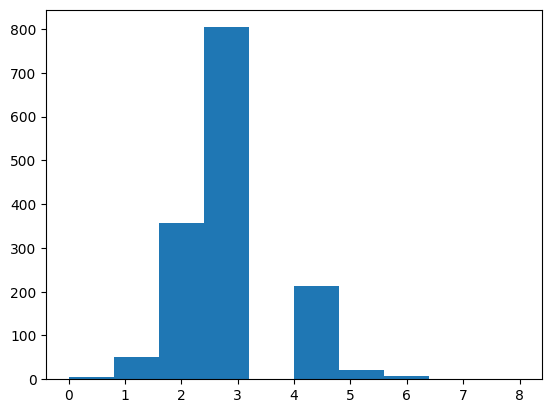

In [16]:
# numeric
plt.hist(df['BedroomAbvGr'])
plt.show()

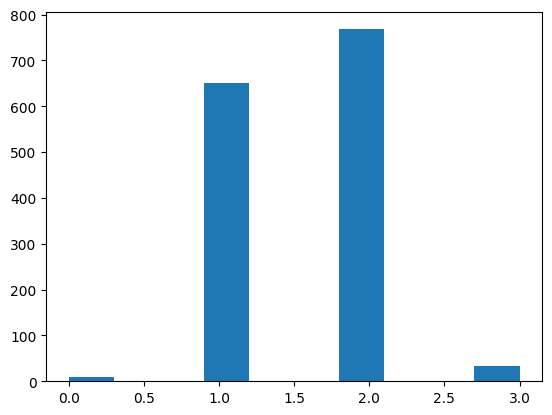

In [17]:
# numeric
plt.hist(df['FullBath'])
plt.show()

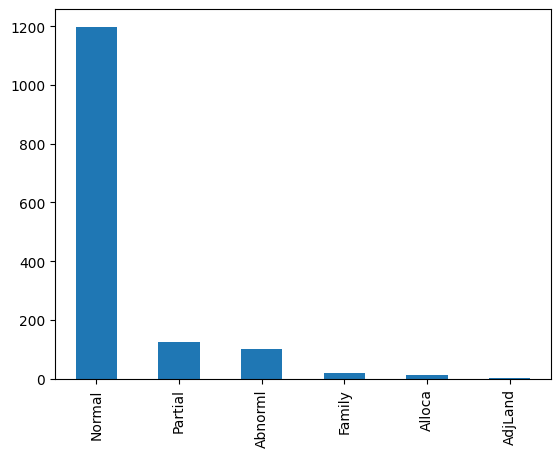

In [18]:
# categorical
df['SaleCondition'].value_counts().plot(kind='bar')
plt.show()

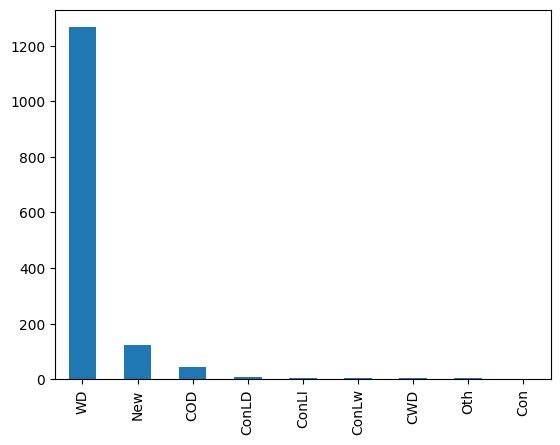

In [19]:
# categorical
df['SaleType'].value_counts().plot(kind='bar')
plt.show()

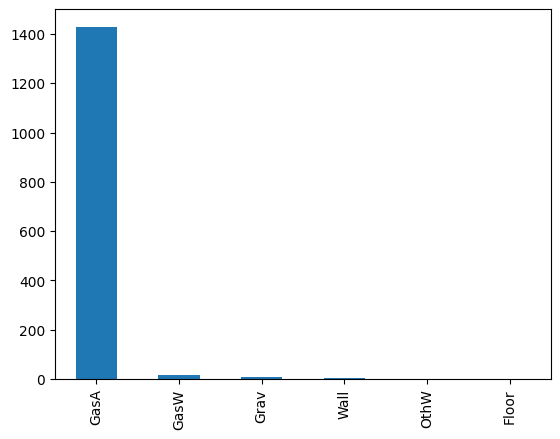

In [20]:
# categorical
df['Heating'].value_counts().plot(kind='bar')
plt.show()

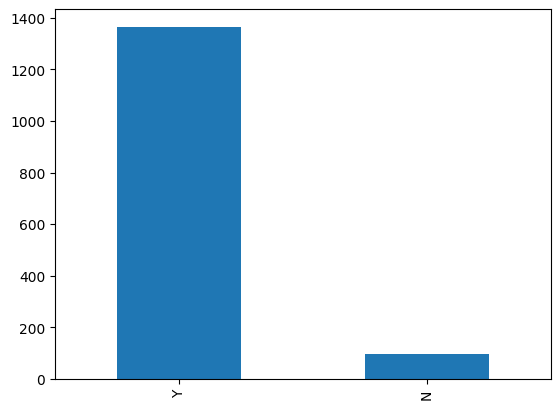

In [21]:
# categorical
df['CentralAir'].value_counts().plot(kind='bar')
plt.show()

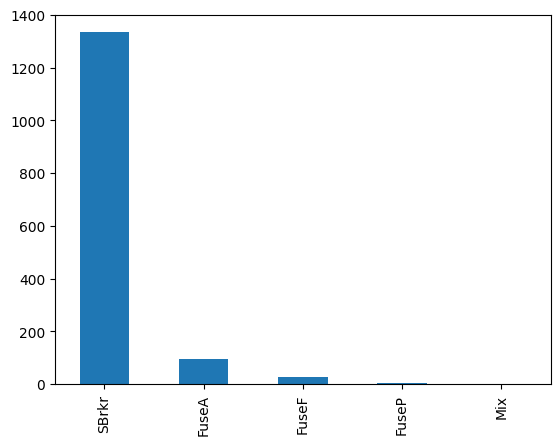

In [22]:
# categorical
df['Electrical'].value_counts().plot(kind='bar')
plt.show()

In [23]:
print(df['LotArea'].describe())

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


In [24]:
print(df['LotArea'].corr(df['SalePrice']))

0.2638433538714056


In [25]:
grouped_df=df.groupby('CentralAir')['SalePrice'].mean()
print(grouped_df)

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64


In [26]:
grouped_df=df.groupby('Heating')['OverallQual'].mean()
print(grouped_df)

Heating
Floor    3.000000
GasA     6.122549
GasW     5.611111
Grav     4.285714
OthW     7.000000
Wall     3.500000
Name: OverallQual, dtype: float64


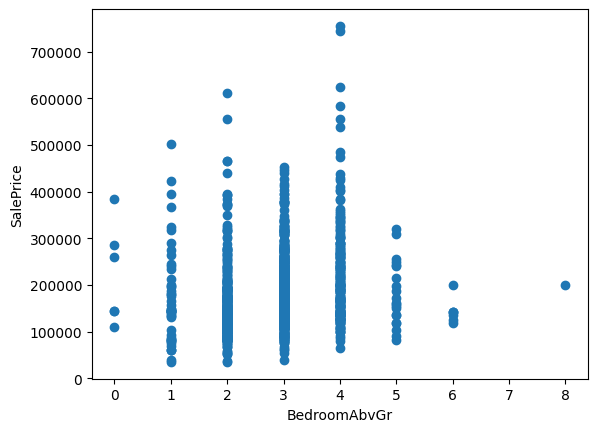

In [27]:
plt.scatter(df['BedroomAbvGr'],df['SalePrice'])
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

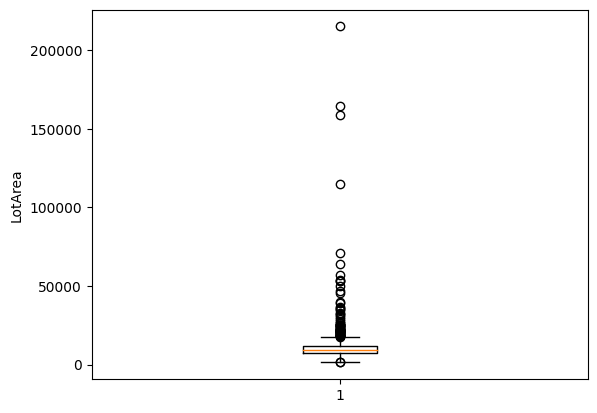

In [28]:
plt.boxplot(df['LotArea'])
plt.ylabel('LotArea')
plt.show()

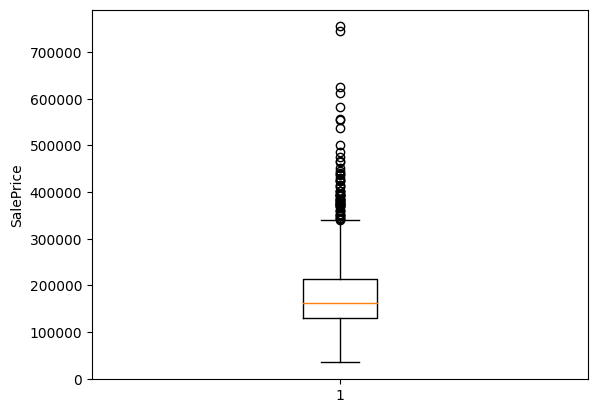

In [29]:
plt.boxplot(df['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [30]:
pivot_table=df.pivot_table(index='OverallCond', columns='CentralAir',values='SalePrice', aggfunc='mean')
print(pivot_table)

CentralAir               N              Y
OverallCond                              
1             61000.000000            NaN
2             86000.000000  179310.666667
3             73801.100000  120681.600000
4             98310.526316  131502.394737
5             96835.464286  206900.660782
6            118792.105263  156829.489270
7            142703.000000  159021.092784
8            124600.000000  157969.029851
9                      NaN  216004.545455


In [31]:
pivot_table2=df.pivot_table(index='OverallCond', columns='OverallQual',values='SalePrice', aggfunc='mean')
print(pivot_table2)

OverallQual       1        2              3              4              5   \
OverallCond                                                                  
1            61000.0      NaN            NaN            NaN            NaN   
2                NaN      NaN   80750.000000   87000.000000   67000.000000   
3            39300.0  47655.5   69166.666667  115800.000000   90571.428571   
4                NaN      NaN   91816.666667   98434.550000  133219.047619   
5                NaN  60000.0  117300.000000  111019.318182  132507.457746   
6                NaN      NaN   69760.000000  111987.833333  137568.846154   
7                NaN      NaN  120000.000000  105949.842105  132282.584270   
8                NaN      NaN  126175.000000  105750.000000  141889.655172   
9                NaN      NaN            NaN  145000.000000  124750.000000   

OverallQual             6              7              8              9   \
OverallCond                                                       

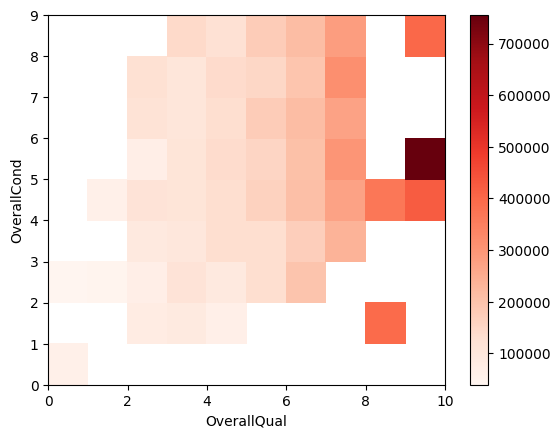

In [32]:
plt.pcolor(pivot_table2,cmap='Reds')
plt.colorbar()
plt.xlabel('OverallQual')
plt.ylabel('OverallCond')
plt.show()

C:\Users\lsnba\AppData\Local\Temp\ipykernel_51176\2134202126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdYlGn', annot= True)


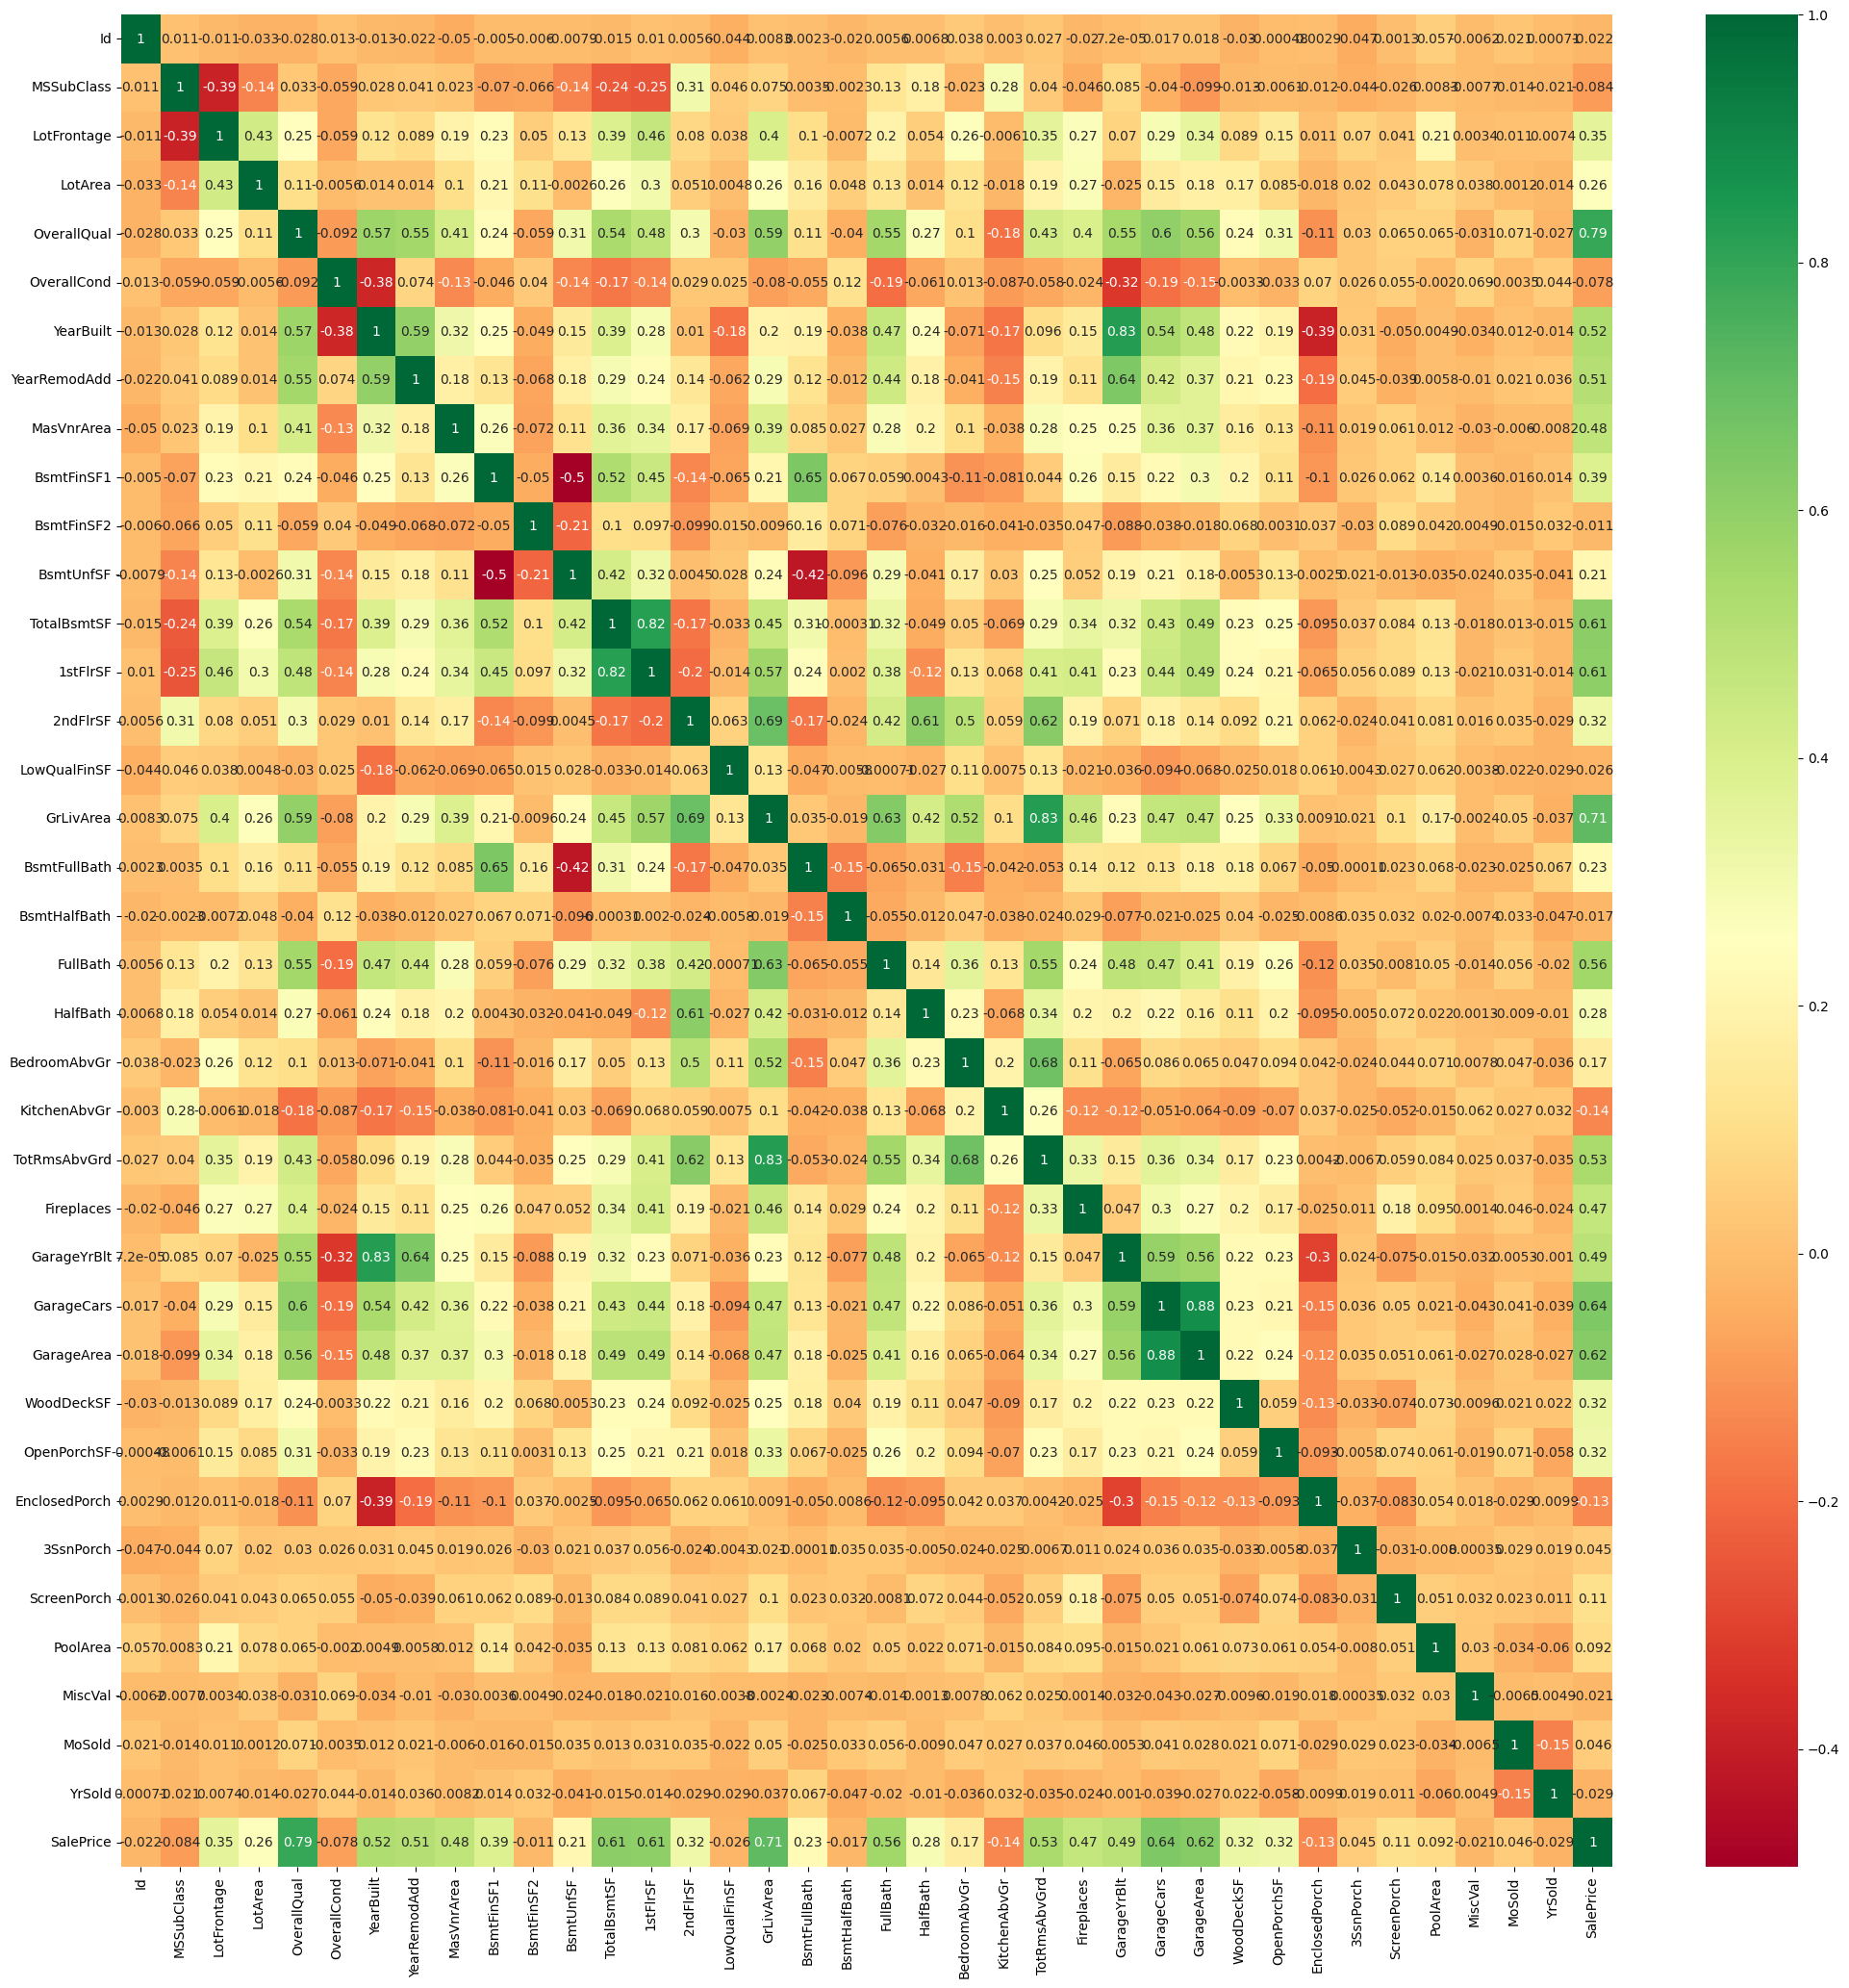

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap='RdYlGn', annot= True)
plt.show()

In [ ]:
# phase 2 *********************

In [34]:
# check for outliers of Sale Price
stat = df.SalePrice.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [102]:
# check for outliers for Sale Price
lower_outlier = df['SalePrice'] < lower
lower_outlier.sum()

0

In [103]:
# check outliers for Sale Price
upper_outlier = df['SalePrice'] > upper
upper_outlier.sum()
# will come back to this after dropping certain columns and rows - inputing missing values

61

In [54]:
print(df.shape)

(1460, 81)


In [121]:
df_copy=df.copy()

In [122]:
print(df_copy.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [123]:
print(df_copy.shape)

(1460, 81)


In [124]:
# drop columns with missing values
df_copy=df_copy.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [125]:
# input missing values with median 
df_copy['LotFrontage'].fillna(df_copy['LotFrontage'].median(), inplace=True)

In [126]:
# drop FireplaceQU
df_copy=df_copy.drop(['FireplaceQu'],axis=1)

In [127]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [128]:
# check for any duplicates
df_copy.duplicated()
df_copy.duplicated().sum()

0

In [129]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [130]:
# drop any rows with missing values
df_copy.dropna(inplace=True)

In [131]:
# make sure values were droped
df_copy.shape

(1338, 76)

In [132]:
# once again check for outliers for SalePrice, this time in the copy with droped columns and values
# originaly the number of outliers for SalePrice was 0
# check for outliers of Sale Price
stat_copy = df_copy.SalePrice.describe()
print(stat)
IQR_copy = stat['75%'] - stat['25%']
upper_copy = stat['75%'] + 1.5 * IQR_copy
lower_copy = stat['25%'] - 1.5 * IQR_copy

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [139]:
# check for outliers for Sale Price
lower_outlier_copy = df_copy['SalePrice'] < lower_copy
upper_outlier_copy = df_copy['SalePrice'] > upper_copy


In [143]:
lower_outlier_copy.sum()

0

In [142]:
upper_outlier_copy.sum()


60

In [146]:
df_copy["SalePrice"][~(lower_outlier_copy|upper_outlier_copy)]
df_copy.shape

(1338, 76)

In [ ]:
# phase 3 *********************

C:\Users\lsnba\AppData\Local\Temp\ipykernel_51176\3283613921.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap='RdYlGn', annot = True)


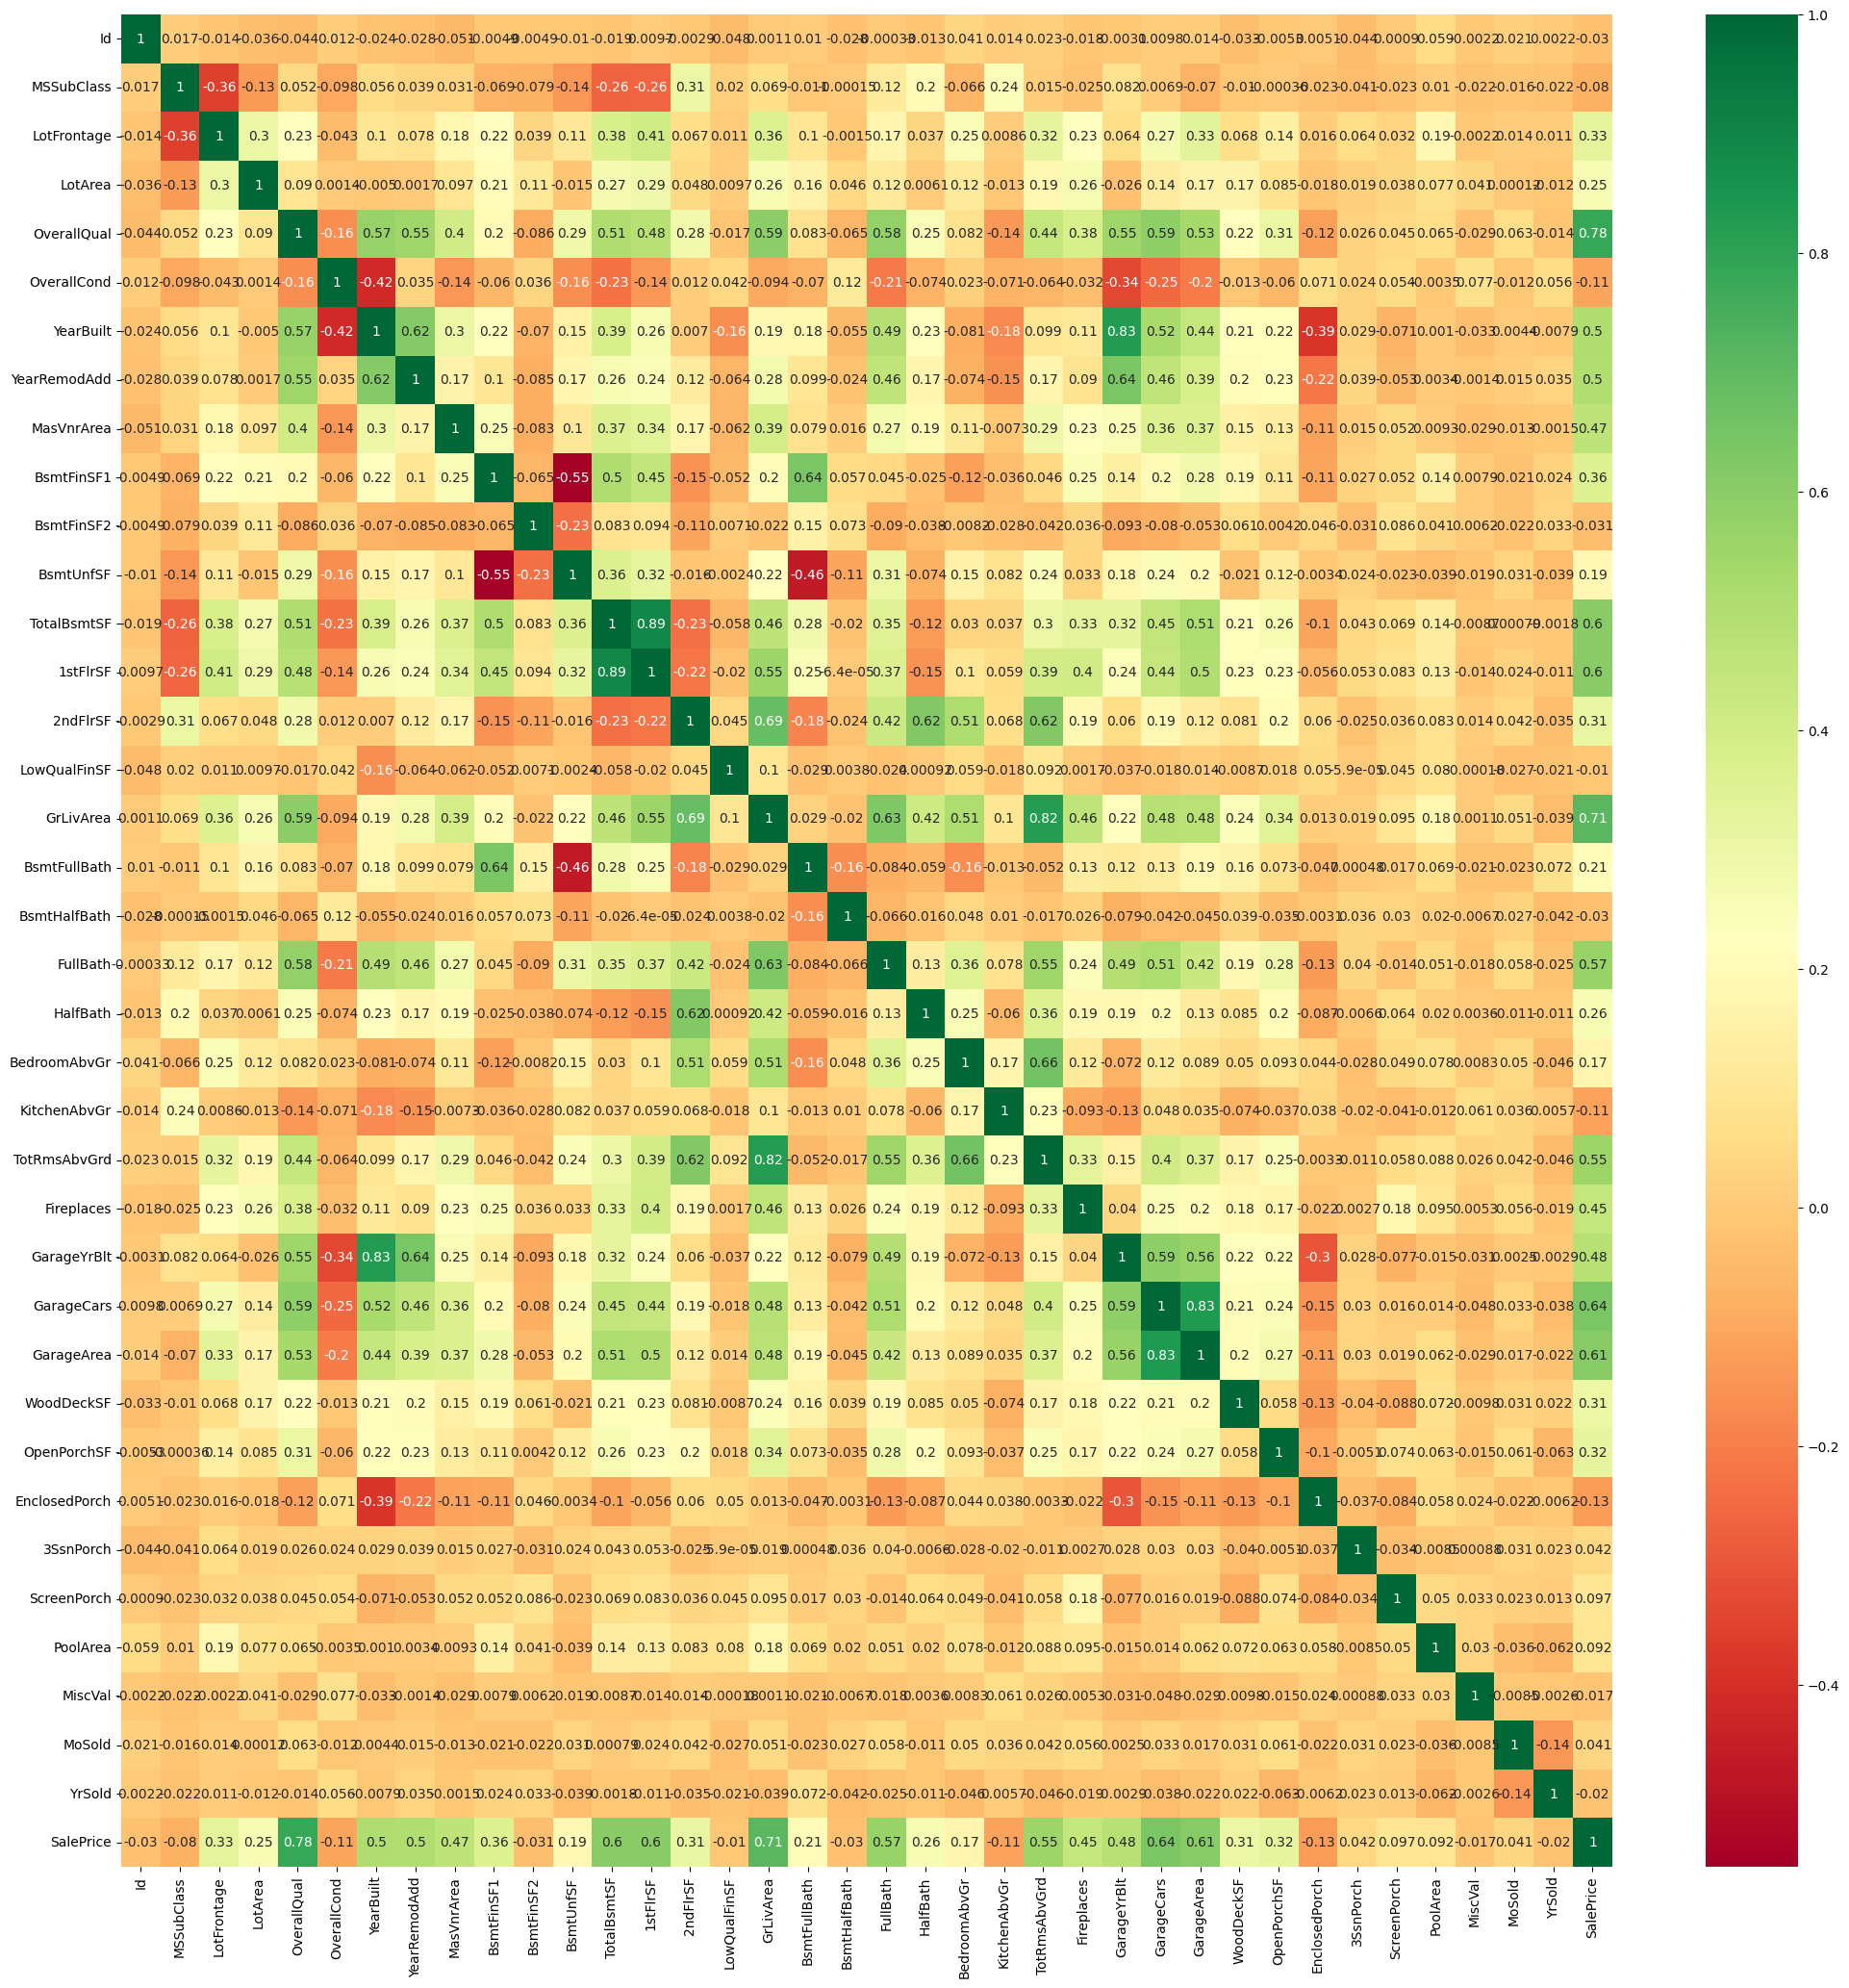

In [147]:
# collinearity 
plt.figure(figsize = (25,25))
sns.heatmap(df_copy.corr(), cmap='RdYlGn', annot = True)
plt.show()

In [152]:
 # drop items without a significant correlation to SalePrice
final_df = df_copy.drop(columns=['Id', 'MSSubClass', 'Street','BsmtFinType2', 'BsmtFinSF2', 'BsmtFullBath','BsmtHalfBath', 'LowQualFinSF', 'GarageFinish', 'GarageCars','GarageCond', 'GarageYrBlt', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PavedDrive', 'WoodDeckSF', 'MoSold', 'Electrical', 'CentralAir','HeatingQC', 'RoofMatl','LandSlope','Foundation', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'SaleType', 'MiscVal', 'Exterior1st', 'Exterior2nd', 'ExterCond'])

In [153]:
final_df.shape

(1338, 43)

In [154]:
final_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,GarageType,GarageArea,GarageQual,PoolArea,YrSold,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,BrkFace,196.0,Gd,Gd,TA,No,GLQ,706,150,856,GasA,856,854,1710,2,1,Gd,Typ,0,Attchd,548,TA,0,2008,Normal,208500
1,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,None,0.0,TA,Gd,TA,Gd,ALQ,978,284,1262,GasA,1262,0,1262,2,0,TA,Typ,1,Attchd,460,TA,0,2007,Normal,181500
2,RL,68.0,11250,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,BrkFace,162.0,Gd,Gd,TA,Mn,GLQ,486,434,920,GasA,920,866,1786,2,1,Gd,Typ,1,Attchd,608,TA,0,2008,Normal,223500
3,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,None,0.0,TA,TA,Gd,No,ALQ,216,540,756,GasA,961,756,1717,1,0,Gd,Typ,1,Detchd,642,TA,0,2006,Abnorml,140000
4,RL,84.0,14260,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,BrkFace,350.0,Gd,Gd,TA,Av,GLQ,655,490,1145,GasA,1145,1053,2198,2,1,Gd,Typ,1,Attchd,836,TA,0,2008,Normal,250000
